<div align="center"><a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/Automatizacion/automatizacion_pygui_bash_os.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg'/> </a> <br> Recordá abrir en una nueva pestaña </div>

## Automatización

En esta clase:

- Aprenderemos sobre programar desde una carpeta, o **directorio de trabajo**, y las una rutas o _path_ relativos, o absolutos.
- Veremos como buscar archivos, también listar, borrar, copiar, mover y otras operaciones usuales con el sistema operativo. Librerías os, glob, shutil
- Lectura de distintos tipos de datos: .sav, .dta, .csv, .zip

Actualmente cualquier tarea que uno se proponga automatizar, así lo es. Podemos encontrar un espectro de complejidad:

- Por un lado, con la librería *pyautogui* podemos automatizar movimientos de mouse y teclado. Esto da la posibilidad de automatizar tareas sencillas de una manera directa.

(El siguiente ejemplo anda solo corriendolo como local!)

```python
# Devuelve las dimensiones de la pantalla
ancho, alto = pyautogui.size()
# Devuelve la posición actual
Xactual, Yactual = pyautogui.position()
# Mover a coordenadas (pixels)
pyautogui.moveTo(100, 150) 
# Clickear
pyautogui.click() 
# Tipear con delay
pyautogui.write('Hello world!', interval=0.25)  
# Apretar una tecla
pyautogui.press('esc') 
pyautogui.hotkey('ctrl', 'c')
pyautogui.locateOnScreen()
```

***Nota: Lamentablemente pyautogui es lo único incluido en cualquiera de nuestros cursos que no funciona en Colab! Para ejecutar esta sección instalar Anaconda en la computadora local***

In [6]:
!pip install pyautogui

In [6]:
from time import sleep
import os
import pyautogui as pygui
import numpy as np

In [8]:
def cuadrado(l):
    pygui.drag(l, 0, duration=1)
    pygui.drag(0, l, duration=1)
    pygui.drag(-l, 0, duration=1)
    pygui.drag(0, -l, duration=1)

In [9]:
cuadrado(200)

In [13]:
url = r'https://www.lanacion.com.ar/'

In [14]:
sleep(2)
pygui.hotkey('ctrl', 't')
sleep(2)
pygui.write(url)
sleep(2)
pygui.press('enter')

In [11]:
def abrir_paint():
    # Windows
    os.system('start mspaint.exe')
    sleep(1)
    S = pygui.size()
    pygui.moveTo(S[0]//2, S[1]//2)

In [10]:
def cuadrado_espiral(l, ratio=0.9):
    pygui.move(-l//2, -l//2, duration=0.1)
    for i in range(50):
        l = l*ratio
        pygui.drag(l, 0, duration=0.1)
        l = l*ratio
        pygui.drag(0, l, duration=0.1)
        l = l*ratio
        pygui.drag(-l, 0, duration=0.1)
        l = l*ratio
        pygui.drag(0, -l, duration=0.1)
        if l < 5:
            break

In [12]:
sleep(2)
abrir_paint()
cuadrado_espiral(600)

Ocasionalmente hay algunos casos de uso, pero encontramos obstáculos:

- Frágil ante cambios
- Método bruto, ad hoc
- Solo tareas sencillas

Encontraremos el mismo dilema más adelante en _web scraping_, en un extremo el consumo de APIs y en otro la automatización del navegador.

## Bash y OS

### Interactuando con el Sistema Operativo

In [15]:
# Con ! enviamos un comando a la terminal del sistema operativo
!pwd

C:\Users\Matias\MyStuff\cursos-python\Automatizacion


In [18]:
!ls

automatizacion_pyguyi_bash_os.ipynb
Expo_2021.zip
expresiones_regulares.ipynb
expresiones_regulares_sol.ipynb
gsheets_pytrends.ipynb


Algunos comandos a saber:

- pwd : "print working directory"
- ls: listar directorio actual
- wget: para descargar archivos 

In [ ]:
# http://microdatos.dane.gov.co/index.php/catalog/472/get_microdata
!wget -O Expo_2021.zip https://unket.s3.sa-east-1.amazonaws.com/data/Expo_2021.zip

In [20]:
!pwd

C:\Users\Matias\MyStuff\cursos-python\Automatizacion


In [22]:
carpeta_actual = os.getcwd()
carpeta_actual

'C:\\Users\\Matias\\MyStuff\\cursos-python\\Automatizacion'

In [24]:
carpeta_actual.split('\\')[-1]

'Automatizacion'

Librería OS

In [19]:
import os

```python
#Devuelve el "current working directory", o directorio actual de trabajo
os.getcwd() 

#Es por "change directory", o sea cambiar el directorio actual de trabajo
os.chdir(path)

#recorre recursivamente el árbol de directorios, empezando por el path. 
#en cada iteracion devuelve carpeta, [subcarpetas], [archivos]
os.walk(path)

#crea un directorio
os.makedirs(path)

#chequea si existe un path
os.path.exists(path)

#borra un archivo o carpeta vacia
os.remove(path)

#enumera el contenido del path
os.listdir(path)

#permite cambiar paths, nombres y extensiones
os.rename(path, new_path)

# Devuelve la ruta absoluta de una ruta relativa
os.path.abspath(path)

```

Cuatro maneras de listar la carpeta actual

In [25]:
# Con la terminal
!ls

automatizacion_pyguyi_bash_os.ipynb
Expo_2021.zip
expresiones_regulares.ipynb
expresiones_regulares_sol.ipynb
gsheets_pytrends.ipynb


In [27]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 760A-09D7

 Directory of C:\Users\Matias\MyStuff\cursos-python\Automatizacion

10/04/2021  10:50 PM    <DIR>          .
10/04/2021  10:50 PM    <DIR>          ..
10/04/2021  10:45 PM    <DIR>          .ipynb_checkpoints
10/04/2021  10:50 PM            67,444 automatizacion_pyguyi_bash_os.ipynb
10/04/2021  09:57 PM        65,811,481 Expo_2021.zip
10/05/2021  12:25 AM            18,752 expresiones_regulares.ipynb
10/05/2021  12:25 AM            18,350 expresiones_regulares_sol.ipynb
10/05/2021  12:25 AM            25,871 gsheets_pytrends.ipynb
               5 File(s)     65,941,898 bytes
               3 Dir(s)  184,259,207,168 bytes free


In [29]:
# Con Python
# ruta relativa

os.listdir('.')

['.ipynb_checkpoints',
 'automatizacion_pyguyi_bash_os.ipynb',
 'Expo_2021.zip',
 'expresiones_regulares.ipynb',
 'expresiones_regulares_sol.ipynb',
 'gsheets_pytrends.ipynb']

In [30]:
# Con Python
# ruta absoluta

os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'automatizacion_pyguyi_bash_os.ipynb',
 'Expo_2021.zip',
 'expresiones_regulares.ipynb',
 'expresiones_regulares_sol.ipynb',
 'gsheets_pytrends.ipynb']

Tres maneras de ver el directorio actual de trabajo

In [34]:
os.getcwd()

'C:\\Users\\Matias\\MyStuff\\cursos-python\\Automatizacion'

In [33]:
!pwd

C:\Users\Matias\MyStuff\cursos-python\Automatizacion


In [35]:
os.path.abspath('.')

'C:\\Users\\Matias\\MyStuff\\cursos-python\\Automatizacion'

Ejercicio

Crear una carpeta nueva con la función ```os.makedirs()```. Recibe simplemente la ruta a la carpeta a crear

In [36]:
new_dir = 'nueva_carpeta'


Ejercicio:

Cambiar el directorio de trabajo a 'new_dir' usando os.chdir

In [38]:
!pwd

C:\Users\Matias\MyStuff\cursos-python\Automatizacion\nueva_carpeta


In [42]:
import zipfile

# Extraemos en la nueva carpeta
with zipfile.ZipFile('../Expo_2021.zip', "r") as zip_ref:
    zip_ref.extractall('.')   

Buscamos todos los .zip

In [44]:
for elemento in os.listdir('./Expo_2021/'):  
    if elemento[-4:] == '.zip':
        print(elemento)

Abril.zip
Agosto.zip
Enero.zip
Febrero.zip
Julio.zip
Junio.zip
Marzo.zip
Mayo.zip


Ahora usando glob

In [45]:
from glob import glob

In [70]:
# ruta con todos los archivos
datos_path = './Expo_2021/' 

In [49]:
zip_files = glob(datos_path + '/*.zip')
zip_files

['./Expo_2021\\Abril.zip',
 './Expo_2021\\Agosto.zip',
 './Expo_2021\\Enero.zip',
 './Expo_2021\\Febrero.zip',
 './Expo_2021\\Julio.zip',
 './Expo_2021\\Junio.zip',
 './Expo_2021\\Marzo.zip',
 './Expo_2021\\Mayo.zip']

Hacemos un búcle para recorrer los archivos .zip y descomprimirlos en carpetas correspondientes

In [55]:
import zipfile

# Recorremos la lista de zips
for f in zip_files:

    # Definimos el nombre de la nueva carpeta en una variable
    # Es la misma ruta "f" pero sin el ".zip"

    new_dir = f.replace('.zip', '')
    print(new_dir)

    # Extraemos en la nueva carpeta
    with zipfile.ZipFile(f, "r") as zip_ref:
        zip_ref.extractall(new_dir)      
    sleep(0.5)

./Expo_2021\Abril
./Expo_2021\Agosto
./Expo_2021\Enero
./Expo_2021\Febrero
./Expo_2021\Julio
./Expo_2021\Junio
./Expo_2021\Marzo
./Expo_2021\Mayo


In [57]:
# Vemos que ya estan los .zips, y carpetas correspondientes
os.listdir('Expo_2021')

['Abril',
 'Abril.zip',
 'Agosto',
 'Agosto.zip',
 'Enero',
 'Enero.zip',
 'Febrero',
 'Febrero.zip',
 'Julio',
 'Julio.zip',
 'Junio',
 'Junio.zip',
 'Marzo',
 'Marzo.zip',
 'Mayo',
 'Mayo.zip']

La estructura queda así:

```
.
├── Expo_2021
│   ├── Abril
│   │   ├── Abril.csv
│   │   ├── Abril.dta
│   │   └── Abril.sav
│   ├── Abril2021.zip

...

│   ├── Octubre
│   │   ├── Octubre.csv
│   │   ├── Octubre.dta
│   │   └── Octubre.sav
│   ├── Octubre2021.zip
│   ├── Septiembre
│   │   ├── Septiembre.csv
│   │   ├── Septiembre.dta
│   │   └── Septiembre.sav
│   └── Septiembre2021.zip

```

In [61]:
# Buscamos los archivos del tipo que queremos usando glob
# Podemos cambiar el tipo cambiando la siguiente variable

# tipo = 'dta'
# tipo = 'csv'
tipo = 'sav'

In [64]:
datos = glob(f'{datos_path}/*/*{tipo}')
datos

['./Expo_2021\\Abril\\Abril.sav',
 './Expo_2021\\Agosto\\Agosto.sav',
 './Expo_2021\\Enero\\Enero.sav',
 './Expo_2021\\Febrero\\Febrero.sav',
 './Expo_2021\\Julio\\Julio.sav',
 './Expo_2021\\Junio\\Junio.sav',
 './Expo_2021\\Marzo\\Marzo.sav',
 './Expo_2021\\Mayo\\Mayo.sav']

In [72]:
datos_path + tipo + '_2021'

'./Expo_2021/sav_2021'

In [71]:
# Chequeamos si la carpeta ya existe, y si no creamos una carpeta para guardar todos archivos los de ese tipo 

if not os.path.exists(datos_path + '/' + tipo + '_2021'):
    os.mkdir(datos_path + tipo + '_2021')

In [73]:
# Vemos que se creó la carpeta "sav_2021"

!ls Expo_2021

Abril
Abril.zip
Agosto
Agosto.zip
Enero
Enero.zip
Febrero
Febrero.zip
Julio
Julio.zip
Junio
Junio.zip
Marzo
Marzo.zip
Mayo
Mayo.zip
sav_2021


In [74]:
datos

['./Expo_2021\\Abril\\Abril.sav',
 './Expo_2021\\Agosto\\Agosto.sav',
 './Expo_2021\\Enero\\Enero.sav',
 './Expo_2021\\Febrero\\Febrero.sav',
 './Expo_2021\\Julio\\Julio.sav',
 './Expo_2021\\Junio\\Junio.sav',
 './Expo_2021\\Marzo\\Marzo.sav',
 './Expo_2021\\Mayo\\Mayo.sav']

In [83]:
# Movemos todos los que los archivos de ese tipo a la nueva carpeta
# Podemos chequear si ya está en la carpeta con os.path.exists 

for d in datos:
    # Definimos en una variable cuál va a ser la nueva ruta
    new_path = datos_path + tipo + '_2021/' + d.replace('\\', '/').split('/')[-1]
    if not os.path.exists(new_path):
        os.rename(d, new_path)

In [82]:
new_path

'./Expo_2021/sav_2021/Abril.sav'

In [85]:
# Listamos los archivos dentro de la nueva carpeta

!ls {datos_path}/{tipo}_2021

Abril.sav
Agosto.sav
Enero.sav
Febrero.sav
Julio.sav
Junio.sav
Marzo.sav
Mayo.sav


```
.
├── Expo_2021
│   ├── Abril2021
│   │   ├── Abril.csv
│   │   └── Abril.dta
│   ├── Abril2021.zip
│   ├── Agosto2021
│   │   ├── Agosto.csv

...

│   ├── Octubre2021
│   │   ├── Octubre 2021.csv
│   │   └── Octubre 2021.dta
│   ├── Octubre2021.zip
│   ├── sav_2021
│   │   ├── Abril.sav
│   │   ├── Agosto.sav
│   │   ├── Diciembre.sav
│   │   ├── Enero.sav
│   │   ├── Febrero.sav
│   │   ├── Julio.sav
│   │   ├── Junio.sav
│   │   ├── Marzo.sav
│   │   ├── Mayo.sav
│   │   ├── Noviembre 2021.sav
│   │   ├── Octubre 2021.sav
│   │   └── Septiembre.sav
│   ├── Septiembre2021
│   │   ├── Septiembre.csv
│   │   └── Septiembre.dta
│   └── Septiembre2021.zip
```

En dos casos puede ser necesario recurrir a otra librería, _shutil_

Estos casos son:

- copyfile: para copiar archivos
- rmtree: para borrar directorios

```python
from shutil import copyfile
copyfile(src, dst)
```

Usaremos esta 2da función para limpiar los archivos que extrajimos y no necesitamos

In [87]:
zip_files

['./Expo_2021\\Abril.zip',
 './Expo_2021\\Agosto.zip',
 './Expo_2021\\Enero.zip',
 './Expo_2021\\Febrero.zip',
 './Expo_2021\\Julio.zip',
 './Expo_2021\\Junio.zip',
 './Expo_2021\\Marzo.zip',
 './Expo_2021\\Mayo.zip']

In [89]:
zip_dir

'C:\\Users\\Matias\\MyStuff\\cursos-python\\Automatizacion\\nueva_carpeta\\Expo_2021\\Abril'

In [92]:
import shutil

for f in zip_files:
    
    # ¡CUIDADO!
    # Estas funciones de borrar y renombrar son potencialmente peligrosas
    # Antes de ejecutarlas con una ruta, pueden hacer un print para asegurarse de qué se haría
    
    # Borramos las carpetas de más, para eso
    # buscamos la ruta absoluta del zip. 
    # Sabemos que carpeta donde se extrajo se llama igual pero sin .zip
    zip_dir = os.path.abspath(f).split('.')[0]
    print('Borrando...', zip_dir)

    shutil.rmtree(zip_dir)

    # Borramos también los .zip
    os.remove(f)

Borrando... C:\Users\Matias\MyStuff\cursos-python\Automatizacion\nueva_carpeta\Expo_2021\Abril
Borrando... C:\Users\Matias\MyStuff\cursos-python\Automatizacion\nueva_carpeta\Expo_2021\Agosto
Borrando... C:\Users\Matias\MyStuff\cursos-python\Automatizacion\nueva_carpeta\Expo_2021\Enero
Borrando... C:\Users\Matias\MyStuff\cursos-python\Automatizacion\nueva_carpeta\Expo_2021\Febrero
Borrando... C:\Users\Matias\MyStuff\cursos-python\Automatizacion\nueva_carpeta\Expo_2021\Julio
Borrando... C:\Users\Matias\MyStuff\cursos-python\Automatizacion\nueva_carpeta\Expo_2021\Junio
Borrando... C:\Users\Matias\MyStuff\cursos-python\Automatizacion\nueva_carpeta\Expo_2021\Marzo
Borrando... C:\Users\Matias\MyStuff\cursos-python\Automatizacion\nueva_carpeta\Expo_2021\Mayo


In [93]:
# Nos queda solo la carpeta con todos los archivos del tipo elegido, ordenados

!ls {datos_path}

sav_2021


Cargamos los datos a un DataFrame

In [94]:
from glob import glob

rutas_datos = glob(datos_path + '/*/*' + tipo)
rutas_datos

['./Expo_2021\\sav_2021\\Abril.sav',
 './Expo_2021\\sav_2021\\Agosto.sav',
 './Expo_2021\\sav_2021\\Enero.sav',
 './Expo_2021\\sav_2021\\Febrero.sav',
 './Expo_2021\\sav_2021\\Julio.sav',
 './Expo_2021\\sav_2021\\Junio.sav',
 './Expo_2021\\sav_2021\\Marzo.sav',
 './Expo_2021\\sav_2021\\Mayo.sav']

Leemos 3 tipos de datos:
- Stata
- SPSS
- csv

In [ ]:
# para stata o SPSS
!pip install pyreadstat

In [98]:
import pandas as pd

datos = []

for r in rutas_datos:

    if tipo == 'dta':
        # En el caso de stata necesitamos instalar la siguiente librería
        import pyreadstat

        df, metadata = pyreadstat.read_dta(r)    

    elif tipo == 'sav':
        df = pd.read_spss(r)

    elif tipo == 'csv':
        df = pd.read_csv(r, delimiter = ';')

    else:
        print('Otro tipo!')

    datos.append(df)

dataframe_total = pd.concat(datos)
dataframe_total.to_csv('todos.csv')

In [99]:
dataframe_total.sample(3)

,FECH,ADUA,PAIS,COD_PAI4,COD_SAL1,COD_SAL,DPTO2,VIA,BANDERA,REGIM,...,PBK,PNK,FOBDOL,FOBPES,AGRENA,FLETES,SEGURO,OTROSG,NIT,RAZ_SIAL
14447,2108.0,35.0,023,DEU,35.0,BUN,41.0,1.0,607.0,1.0,...,38536.00,38520.00,180669.93,7.065658e+08,0.0,0.0,0.0,0.0,901012419,SUCAFINA COLOMBIA S.A.S
25769,2103.0,37.0,239,ECU,37.0,IPI,11.0,3.0,239.0,1.0,...,737.92,578.40,7652.40,2.791588e+07,0.0,0.0,0.0,0.0,900393551,GLOBAL DECORATION S.A.S.
30939,2105.0,90.0,239,ECU,11.0,MDE,5.0,4.0,580.0,1.0,...,1.70,1.65,98.00,3.609183e+05,0.0,0.0,0.0,0.0,800169352,MERCADEO Y MODA S.A.S.


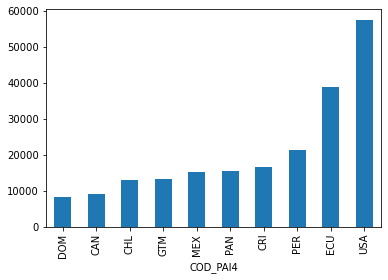

In [100]:
dataframe_total.groupby('COD_PAI4')\
  .count()['CANTI']   \
  .sort_values()      \
  .iloc[-10:]         \
  .plot.bar();

### Ejercicio GSheets

1) Tomar la siguiente lista de temas  
2) Crear una carpeta con su nombre en "title case"  
3) Dentro de cada carpeta, guardar los datos de tendencias para el día de hoy  

In [106]:
temas = ['Python', 'IA', 'Meditación', 'Jazz Rock', 'Sustentabilidad', 'Neurociencias']

La siguiente celda prepara y define una función _get_trends_ para buscar tendencias de Google. La misma recibe una búsqueda y devuelve un diccionario con los datos de las tendencias.

In [104]:
!pip install pytrends

import pandas as pd                       
from pytrends.request import TrendReq

def get_trends(query):
    pytrend = TrendReq()
    pytrend.build_payload(kw_list=[query])
    df = pytrend.interest_by_region()
    return df.sort_values(query, ascending=False)[query].to_dict()

Ahora sí, recorrer la lista de temas y:

- Buscar las tendencias con la función get_trends
- Si no existe ya la carpeta para ese tema, crearla
- Crear un archivo .txt o .csv con los datos buscados dentro de esa carpeta

In [72]:
# Ejemplo
query = 'Python'
tendencias = get_trends(query)
tendencias

{'China': 100,
 'St. Helena': 13,
 'Singapore': 10,
 'South Korea': 9,
 'Israel': 9,
 'Hong Kong': 7,
 'Taiwan': 6,
 'Switzerland': 5,
 'Norway': 5,
 'United States': 5,
 'India': 5,
 'Sweden': 4,
 'Czechia': 4,
 'Ireland': 4,
 'Netherlands': 4,
 'Canada': 4,
 'Slovenia': 4,
 'Tunisia': 4,
 'New Zealand': 4,
 'Finland': 4,
 'Denmark': 4,
 'Australia': 4,
 'United Kingdom': 4,
 'Germany': 4,
 'United Arab Emirates': 3,
 'Russia': 3,
 'Sri Lanka': 3,
 'Japan': 3,
 'Croatia': 3,
 'Pakistan': 3,
 'Kenya': 3,
 'Portugal': 3,
 'Austria': 3,
 'Belgium': 3,
 'Bangladesh': 3,
 'France': 3,
 'Slovakia': 2,
 'Bulgaria': 2,
 'Romania': 2,
 'Serbia': 2,
 'Hungary': 2,
 'Belarus': 2,
 'Kazakhstan': 2,
 'Poland': 2,
 'Colombia': 2,
 'Philippines': 2,
 'Spain': 2,
 'Greece': 2,
 'Chile': 2,
 'Vietnam': 2,
 'Morocco': 2,
 'Ukraine': 2,
 'South Africa': 2,
 'Malaysia': 2,
 'Nigeria': 2,
 'Saudi Arabia': 1,
 'Egypt': 1,
 'Ecuador': 1,
 'Iran': 1,
 'Indonesia': 1,
 'Peru': 1,
 'Mexico': 1,
 'Thailand': 1,

In [105]:
from datetime import datetime

fecha = datetime.now().strftime('%d-%m-%y')
fecha

'04-10-21'

In [107]:
for t in temas:
    # completar
    

Creando 04-10-21/Python.txt
Creando 04-10-21/IA.txt
Creando 04-10-21/Meditación.txt
Creando 04-10-21/Jazz Rock.txt
Creando 04-10-21/Sustentabilidad.txt
Creando 04-10-21/Neurociencias.txt
